In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load the dataset
df = pd.read_excel("C:/Users/Rutvik Suryawanshi/Downloads/archive (3)/global_superstore_2016.xlsx")

In [5]:
# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
# Data Cleaning
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
# Selecting Features
X = df[['Profit', 'Discount', 'Quantity', 'Shipping Cost']]
y = df['Sales']

In [8]:
# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Training a Simple Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Evaluating the Model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.5696866936536136
Mean Squared Error: 131518.1528625951


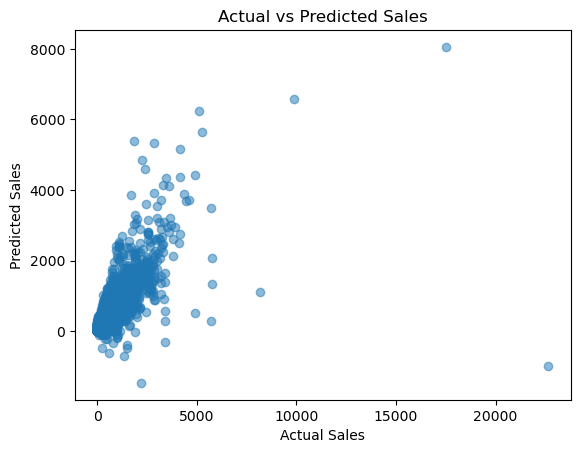

In [12]:
# Simple Visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()